In [1]:
#import the libraries
from PIL import Image
from pytesseract import pytesseract
import pandas as pd

In [2]:
#read the images
im1 = Image.open('Walmart.PNG')
im2 = Image.open('Amazon.PNG')

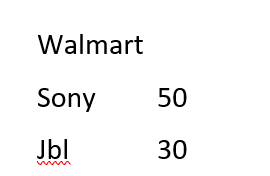

In [3]:
#display the image img1
im1

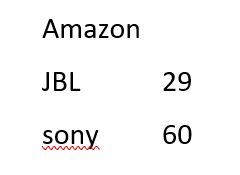

In [5]:
#display the image img2
im2

In [6]:
#fetch the text in english from the image img1 & img2 
tx1 = pytesseract.image_to_string(im1, lang='eng')
tx2 = pytesseract.image_to_string(im2, lang='eng')

In [7]:
#convert everything to lower case cuz in the process we might get error cuz of mismatch when comparing strings
tx1 = tx1.lower()
tx2 = tx2.lower()

In [8]:
#function to split the text fetched from image in a representable form 
def spl_func(text):
    list = []
    sp = text.split('\n')
    for i in sp:
        ve = i.split(' ')
        for t in [ve]:
            if len(t) == 1:
                if t[0] == '':
                    continue
                t.append(' ')
            list.append(t)
    #print(list)
    df = pd.DataFrame(list)
    return df

In [9]:
#call the function spl_func and store the values in dataFrame df1 and df2 
df2 = spl_func(tx1)
df1 = spl_func(tx2)

In [10]:
#print the values of dataFrame
print(df1)
print(df2)

        0   1
0  amazon    
1     jbl  29
2    sony  60
         0   1
0  walmart    
1     sony  50
2      jbl  30


In [11]:
#create a list of the dataFrame
df_list = [df1, df2]

In [12]:
#get a user input for the desired product
pr = input("Enter Product : ")

Enter Product : jbl


In [13]:
# create a key value pair i.e. dictinary for the vendor as key and amount as the value 
l={}
val = []
for idx, i in enumerate(df_list):
    for j in range(len(i)):
        if pr == i.iloc[j][0]:
            k = i.iloc[0][0]
            v = i.iloc[j][1]
            #val.append(i.iloc[j][1])
            l.update({k : v })

In [14]:
#sort the dictinory
l =sorted(l.items(), key=lambda l: l[1])

In [15]:
#output to the user
print("You can get the cheapest price of "+ pr + " at " + l[0][0] + " for a price of $" + l[0][1])

You can get the cheapest price of jbl at amazon for a price of $29
